In [1]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

# Cointegration

In [2]:
#function to find cointegrated pairs
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [3]:
import datetime as dt
import pandas_datareader.data as web

ls_key = 'Adj Close'
start= dt.datetime(2007,1,9)
end= dt.datetime(2017,1,30)

stocks = ['SPY','AAPL','ADBE','SYMC','EBAY','MSFT','QCOM',
                 'HPQ','JNPR','AMD','IBM']

df=web.DataReader(stocks,'yahoo',start,end)
cleanData = df[ls_key]

In [4]:
cleanData.head()

Symbols,AAPL,ADBE,AMD,EBAY,HPQ,IBM,JNPR,MSFT,QCOM,SPY,SYMC
Date,,,,,,,,,,,
2007-01-09,8.855811,39.630001,19.650000,12.521044,12.939446,72.974365,18.512600,22.650431,28.571934,110.930107,15.405072
2007-01-10,9.279611,39.220001,20.010000,12.331650,12.939446,72.113838,18.715630,22.423624,29.108023,111.299667,15.326508
2007-01-11,9.164813,39.880001,20.180000,12.723064,13.074358,71.938866,19.075546,23.209890,29.810244,111.787224,15.233668
2007-01-12,9.051928,39.959999,18.260000,12.626263,13.347250,72.441994,18.992487,23.595461,29.915955,112.636490,14.626607
2007-01-16,9.289178,40.049999,18.129999,12.643098,13.246067,73.521294,19.167837,23.557657,29.802694,112.416328,12.705437


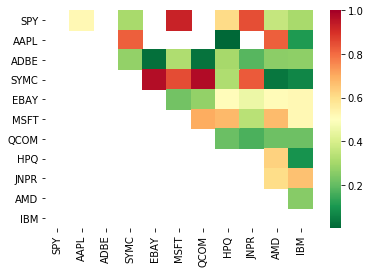

[('ADBE', 'MSFT'), ('AMD', 'HPQ'), ('AMD', 'JNPR'), ('EBAY', 'SPY')]


In [5]:
#HeatMap shows level of cointegration
#print out cointegrated pairs, i.e. p-values <.05

scores, pvalues, pairs = find_cointegrated_pairs(cleanData)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=stocks, 
                yticklabels=stocks, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.98)
                )
plt.show()
print(pairs)